# Problem Statment:

Climate change is a large-scale, long-term shift in the planet’s weather patterns and average temperatures, with trends showing a move towards warmer, wetter and less predictable weather in Scotland. This will challenge established ways of living globally.

so here i am going to forecast the max, min and average temperature for the city of glasgow the capital of scotland

# Data dictionary:
The data i am working on represents glasgow wether from 2015 to Nov-2019

and here is a table to make it clear what feature do we have:

|Feature|Type|Description|
|---|---|---|
|**day**|*object*|Represents when the data recorded.| 
|**tempMin**|*float*|Represents the minimum temperature.|
|**tempMax**|*float*|Represent the maximum temperature.|
|**summary**|*object*|Description of the weather condition|
|**desc**|*object*|Description of the weather condition|
|**cloudCover**|*float*|The value of cloudcover|
|**humidity**|*float*|The value of humidity|
|**windSpeed**|*float*|The value of the wind speed|
|**visibility**|*float*|The value of the visibilty|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA, ARMA, AR
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import date
from datetime import timedelta
from pmdarima import auto_arima

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# read the data and name it df
df = pd.read_csv('./clean_weather_data.csv')

In [3]:
# check the data and what it looks like
df.head()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
0,2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
1,2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2,2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
3,2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
4,2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [4]:
# see the shape of the data
df.shape

(1795, 9)

In [5]:
# check of there is any missing data
df.isnull().sum()

day             0
tempMin         0
tempMax         0
summary         7
desc          184
cloudCover      3
humidity        0
windSpeed       0
visibility      0
dtype: int64

In [6]:
# check the the type of the feature using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
day           1795 non-null object
tempMin       1795 non-null float64
tempMax       1795 non-null float64
summary       1788 non-null object
desc          1611 non-null object
cloudCover    1792 non-null float64
humidity      1795 non-null float64
windSpeed     1795 non-null float64
visibility    1795 non-null float64
dtypes: float64(6), object(3)
memory usage: 126.3+ KB


In [7]:
# change the type of the day from object to date time
df.day = pd.to_datetime(df.day, format="%Y-%m-%d")

In [8]:
# check agian if the type of the day has changed this time using .dtype
df.dtypes

day           datetime64[ns]
tempMin              float64
tempMax              float64
summary               object
desc                  object
cloudCover           float64
humidity             float64
windSpeed            float64
visibility           float64
dtype: object

In [9]:
# set the day as an index
df.set_index('day', inplace=True, drop=True)

## Max temperature

In [10]:
# resample the tempMax to monthly instead of daily and name it Max
Max = df.tempMax.resample('MS').mean()

In [11]:
# split the data Max into train and test
# the train from 2015 till 2018
train = Max['2015':'2018']
# the test 2019
test = Max['2019']

In [12]:
# see the train
train.head()

day
2015-01-01     6.816129
2015-02-01     7.349643
2015-03-01     9.188065
2015-04-01    12.908667
2015-05-01    12.806452
Freq: MS, Name: tempMax, dtype: float64

In [13]:
# see the test
test.head()

day
2019-01-01     6.804194
2019-02-01    10.383929
2019-03-01    10.019677
2019-04-01    13.666667
2019-05-01    14.930323
Freq: MS, Name: tempMax, dtype: float64

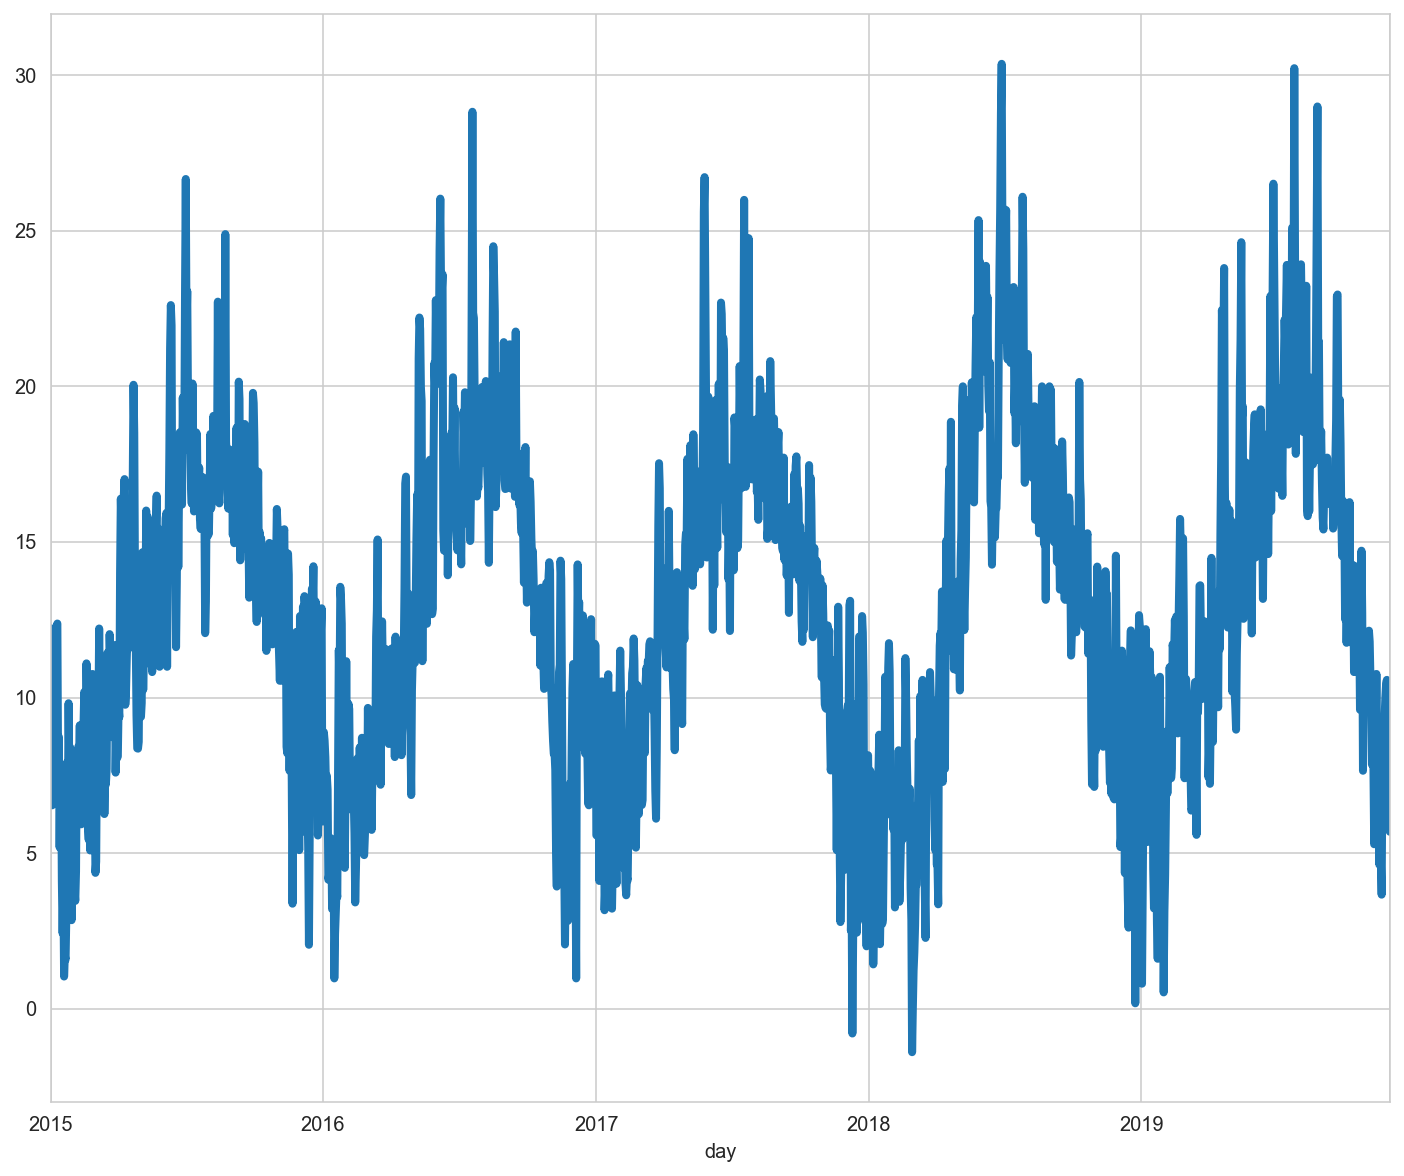

In [14]:
# check if there is any trends for tempMax daily using plot
df['tempMax'].plot(lw=4, figsize=(12, 10))
plt.show()

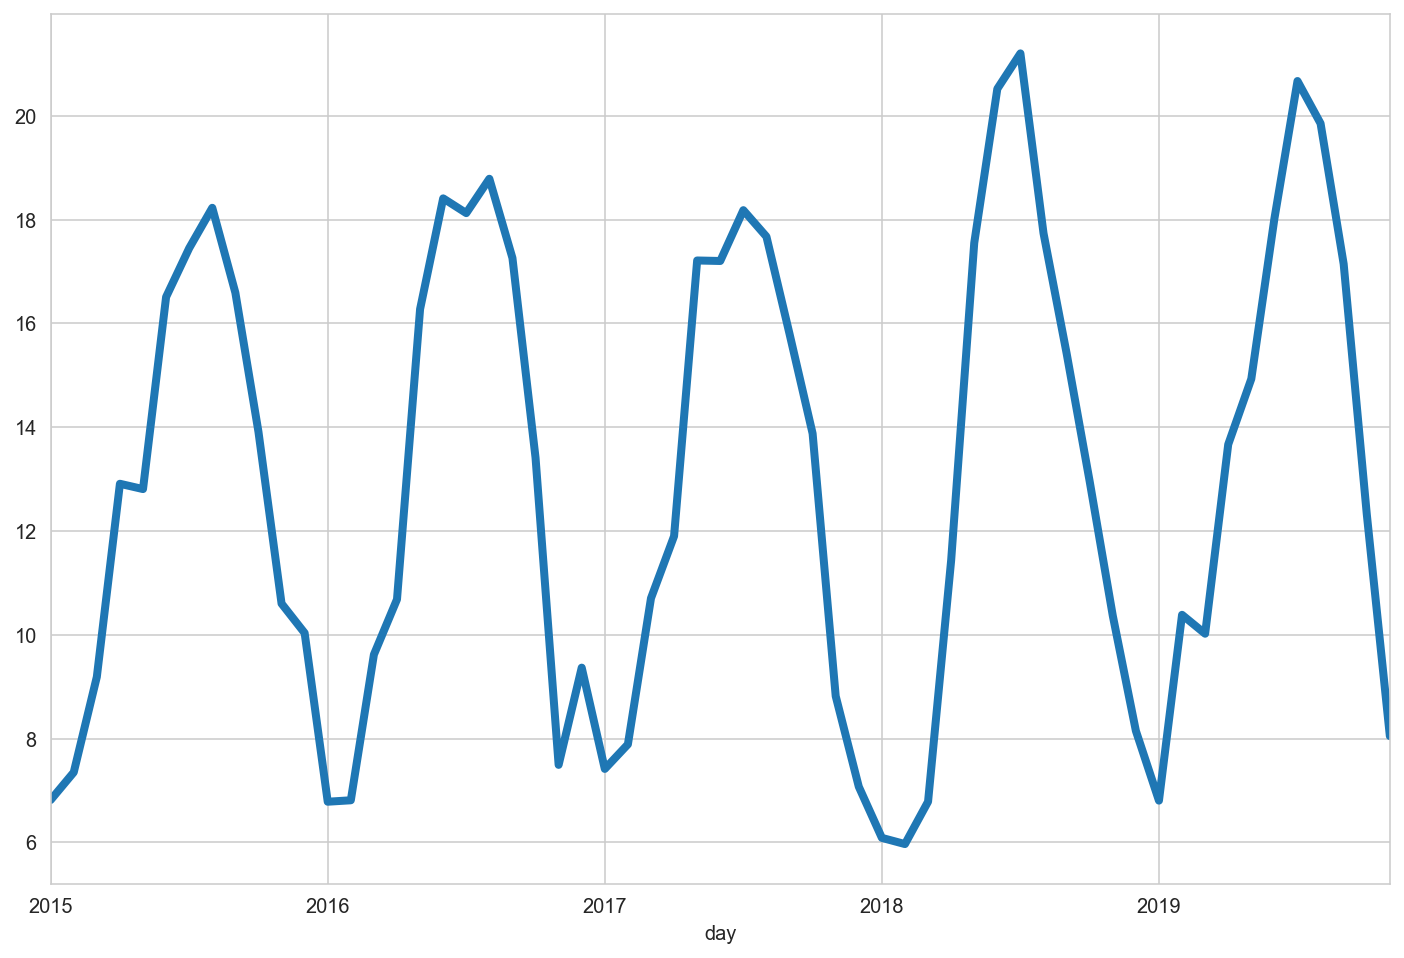

In [15]:
# check if there is any trends for tempMax monthly using plot
Max.plot(lw=4, figsize=(12, 8))
plt.show()

In [16]:
# use auto_arima to find the optimum order and seasona_order
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=141.304, BIC=144.471, Fit time=0.022 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=139.763, BIC=146.098, Fit time=0.196 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=139.405, BIC=144.155, Fit time=0.063 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=141.075, BIC=147.409, Fit time=0.103 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=141.222, BIC=147.556, Fit time=0.147 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=139.280, BIC=147.198, Fit

In [17]:
#Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 0, 12)

In [18]:
# creat SARIMAX model
model = SARIMAX(train, order=(2, 0, 1),
               seasonal_order=(0, 1, 0, 12), 
               enforce_stationarity=True,
               enforce_invertibility=True, freq='MS').fit()


C:\Users\Talal\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Talal\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
# prediction
pred = model.predict(start = '2019', end = '2021')

In [20]:
# see the prediction
pred

2019-01-01     6.382370
2019-02-01     5.894506
2019-03-01     6.578296
2019-04-01    11.212014
2019-05-01    17.365020
2019-06-01    20.384658
2019-07-01    21.113032
2019-08-01    17.683504
2019-09-01    15.394839
2019-10-01    12.940202
2019-11-01    10.362671
2019-12-01     8.148780
2020-01-01     6.383671
2020-02-01     5.896307
2020-03-01     6.579951
2020-04-01    11.213294
2020-05-01    17.365904
2020-06-01    20.385215
2020-07-01    21.113352
2020-08-01    17.683667
2020-09-01    15.394909
2020-10-01    12.940221
2020-11-01    10.362666
2020-12-01     8.148767
2021-01-01     6.383657
Freq: MS, dtype: float64

C:\Users\Talal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


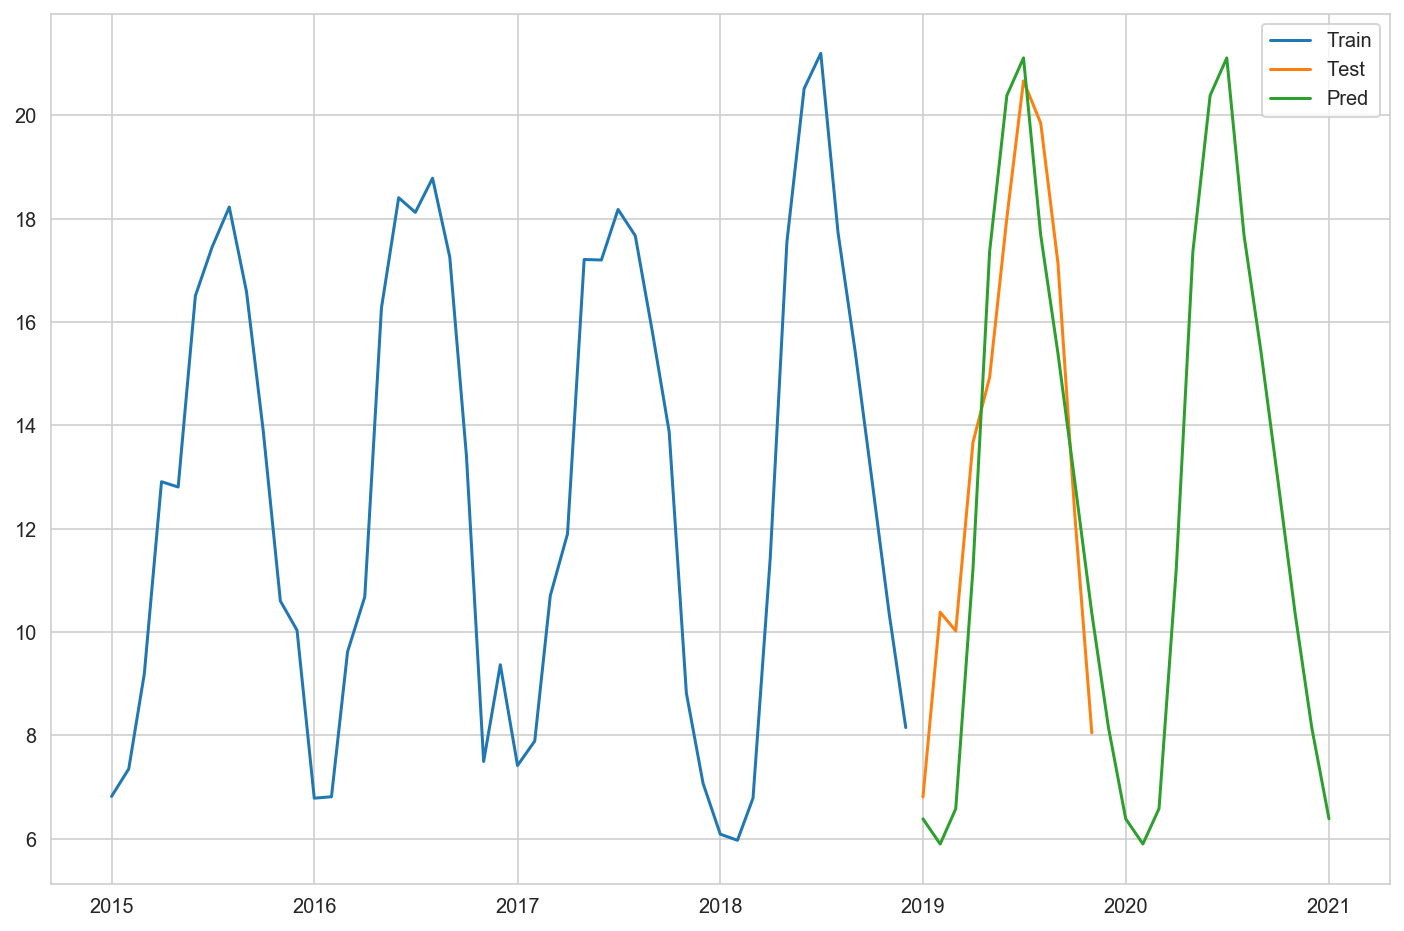

In [21]:
# plot the train, test and the prediction to see how accurate visually
plt.figure(figsize=(12,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.legend(loc='Best')
plt.show()

In [22]:
# to calculate RMSE error 
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, pred[:-14]))


In [23]:
rmse

2.4012824442197918

## Minimum temperature

In [24]:
# resample the tempMin to monthly instead of daily and name it Min
Min= df.tempMin.resample('MS').mean()

In [25]:
# split the data Max into train and test
# the train from 2015 till 2018
train = Min['2015':'2018']
# test 2019
test = Min['2019']

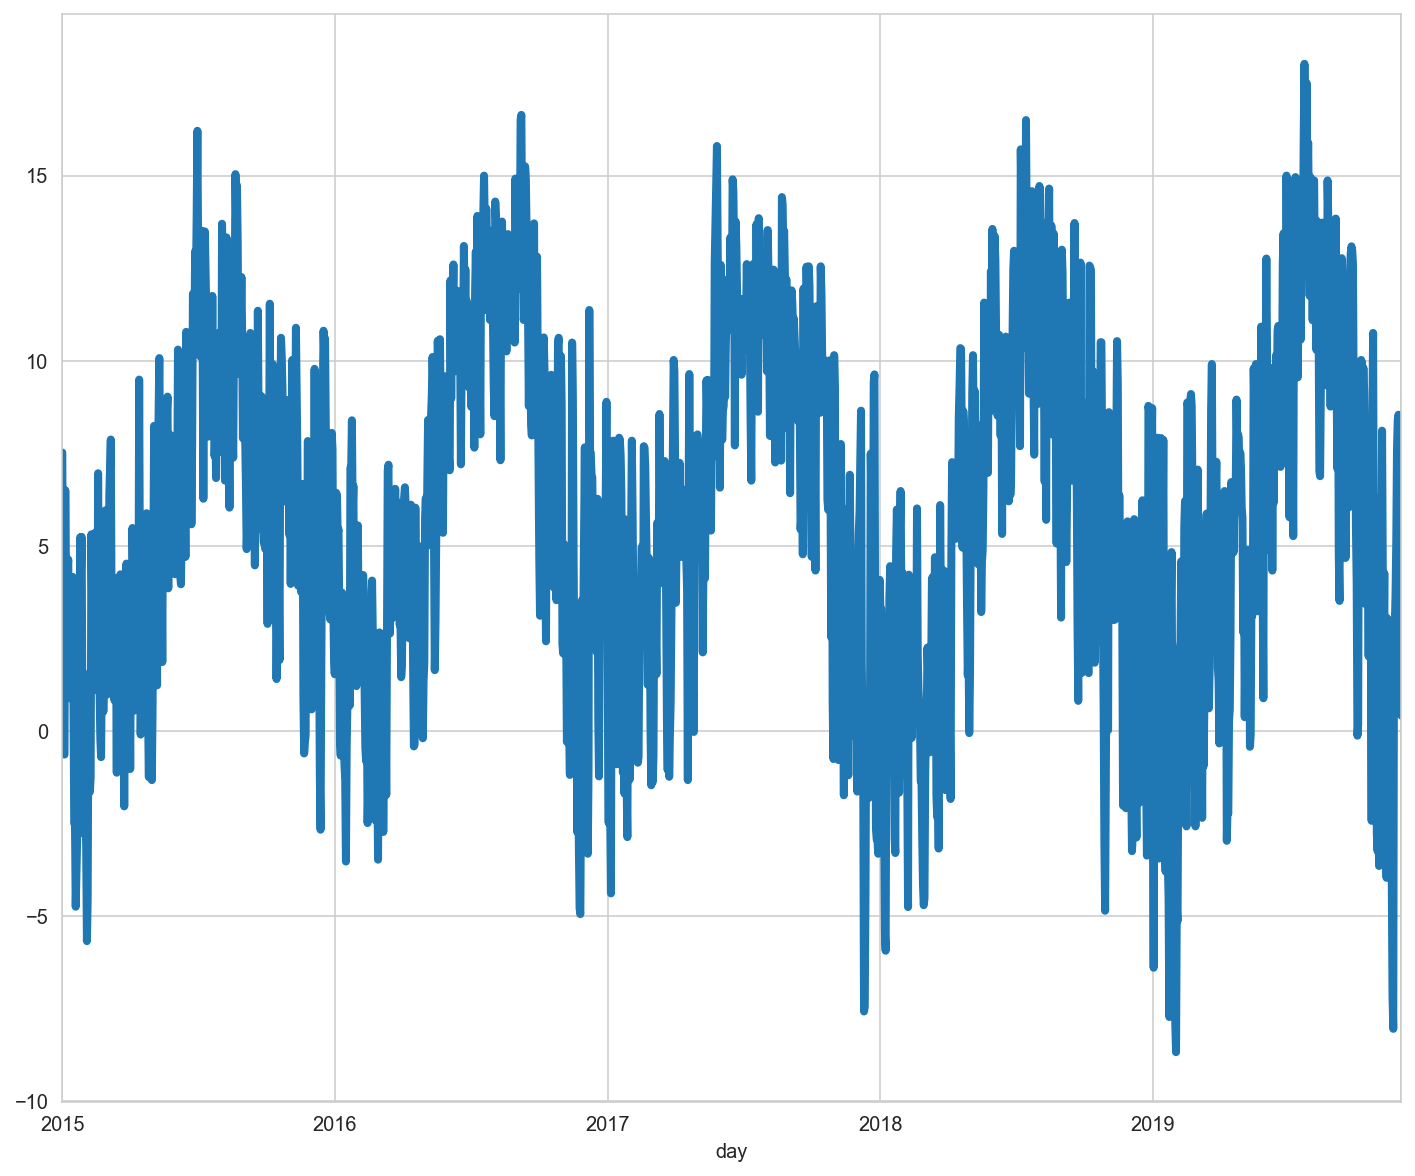

In [26]:
# check if there is any trends for tempMin daily using plot
df['tempMin'].plot(lw=4, figsize=(12, 10))
plt.show()

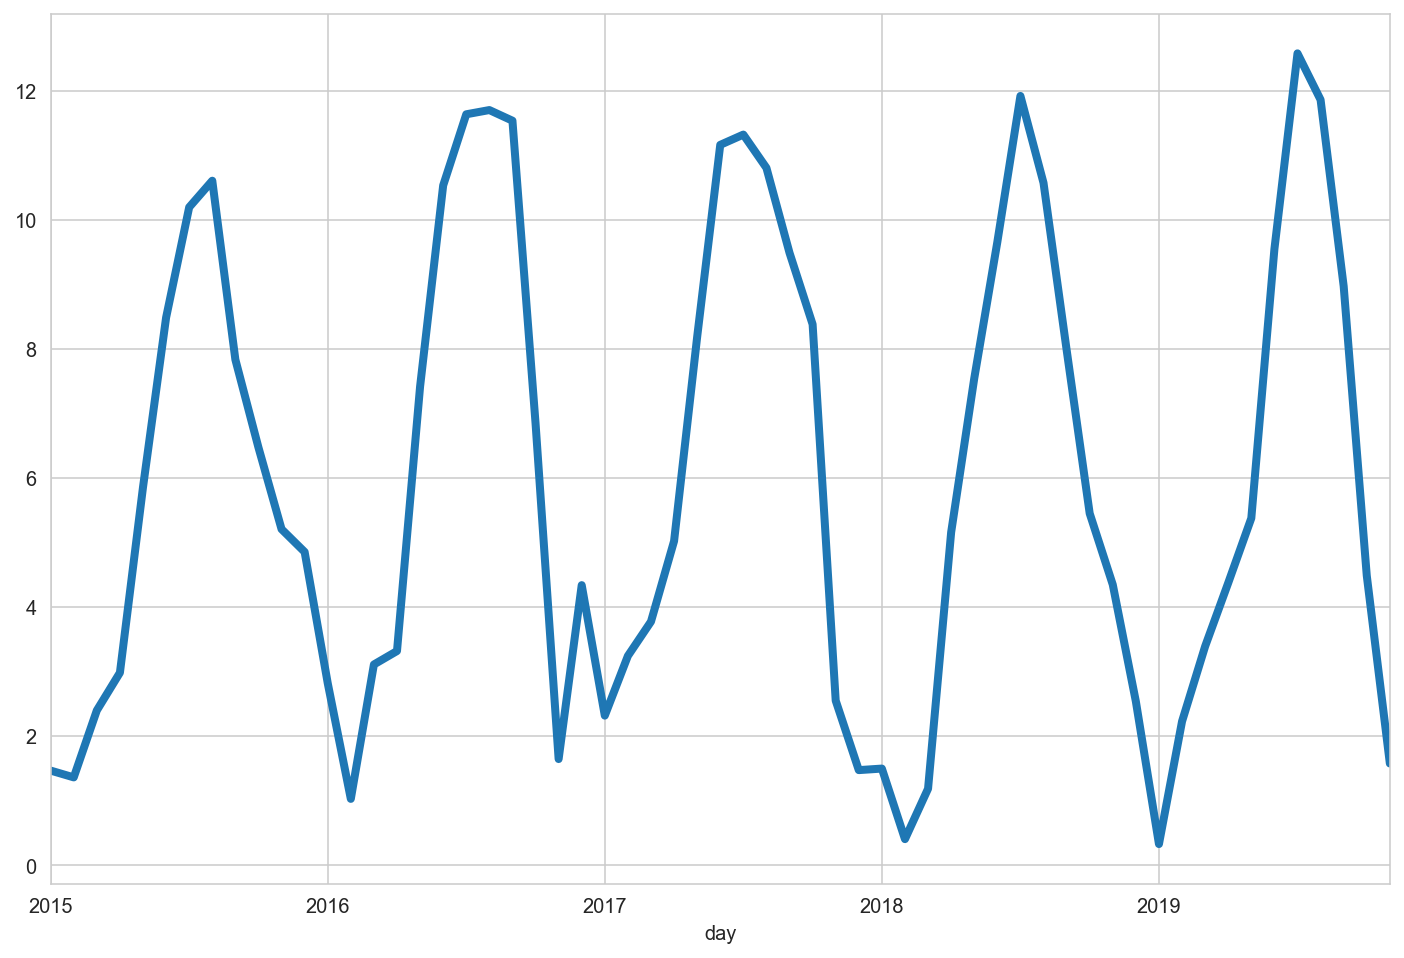

In [27]:
# check if there is any trends for tempMin monthly using plot
Min.plot(lw=4, figsize=(12, 8))
plt.show()

In [28]:
# use auto_arima to find the optimum order and seasona_order
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=142.572, BIC=145.739, Fit time=0.020 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=139.986, BIC=146.320, Fit time=0.244 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=141.603, BIC=146.354, Fit time=0.051 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=133.699, BIC=141.617, Fit time=0.666 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=136.087, BIC=142.421, Fit time=0.519 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=135.658, BIC=145.159, Fit time=0.862 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 0, 12); AIC=135.622, BIC=14

In [29]:
# creat SARIMAX model
model = SARIMAX(train, order=(1, 0, 0),
               seasonal_order=(2, 1, 0, 12), 
               enforce_stationarity=True,
               enforce_invertibility=True, freq='MS').fit()

In [30]:
# prediction
pred = model.predict(start = '2019', end = '2021')

C:\Users\Talal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


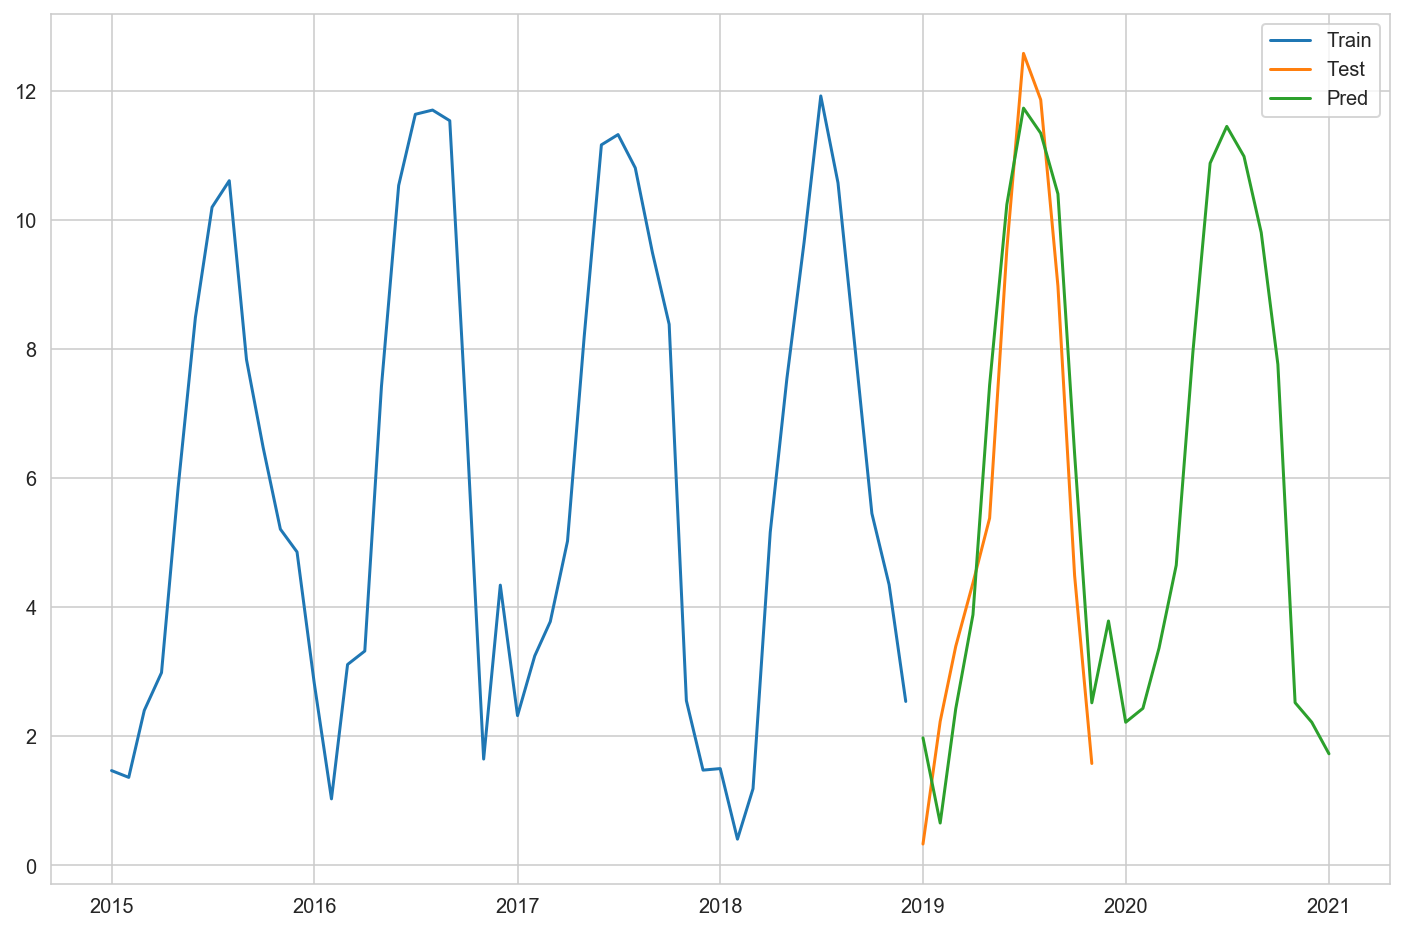

In [31]:
# plot the train, test and the prediction to see how accurate visually
plt.figure(figsize=(12,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.legend(loc='Best')
plt.show()

In [32]:
# caluclate the RMSE error
rmse = sqrt(mean_squared_error(test, pred[:-14]))
rmse

1.3001244755332961

## Average temperature

In [33]:
df.head()

,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
day,,,,,,,,
2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [34]:
# finding the average temperature and adding a new feature
df['avg'] = df[['tempMin', 'tempMax']].mean(axis=1)

In [35]:
# see the data
df.head()

,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility,avg
day,,,,,,,,,
2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43,9.880
2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64,5.365
2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20,2.965
2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22,3.480
2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91,8.470


In [36]:
# resample the avg to monthly instead of daily and name it avg
avg = df.avg.resample('MS').mean()

In [37]:
avg.head()

day
2015-01-01    4.143065
2015-02-01    4.357143
2015-03-01    5.795161
2015-04-01    7.948000
2015-05-01    9.334194
Freq: MS, Name: avg, dtype: float64

In [39]:
# split the data Max into train and test
# the train from 2015 till 2018
train = avg['2015':'2018']
# test 2019
test = avg['2019']

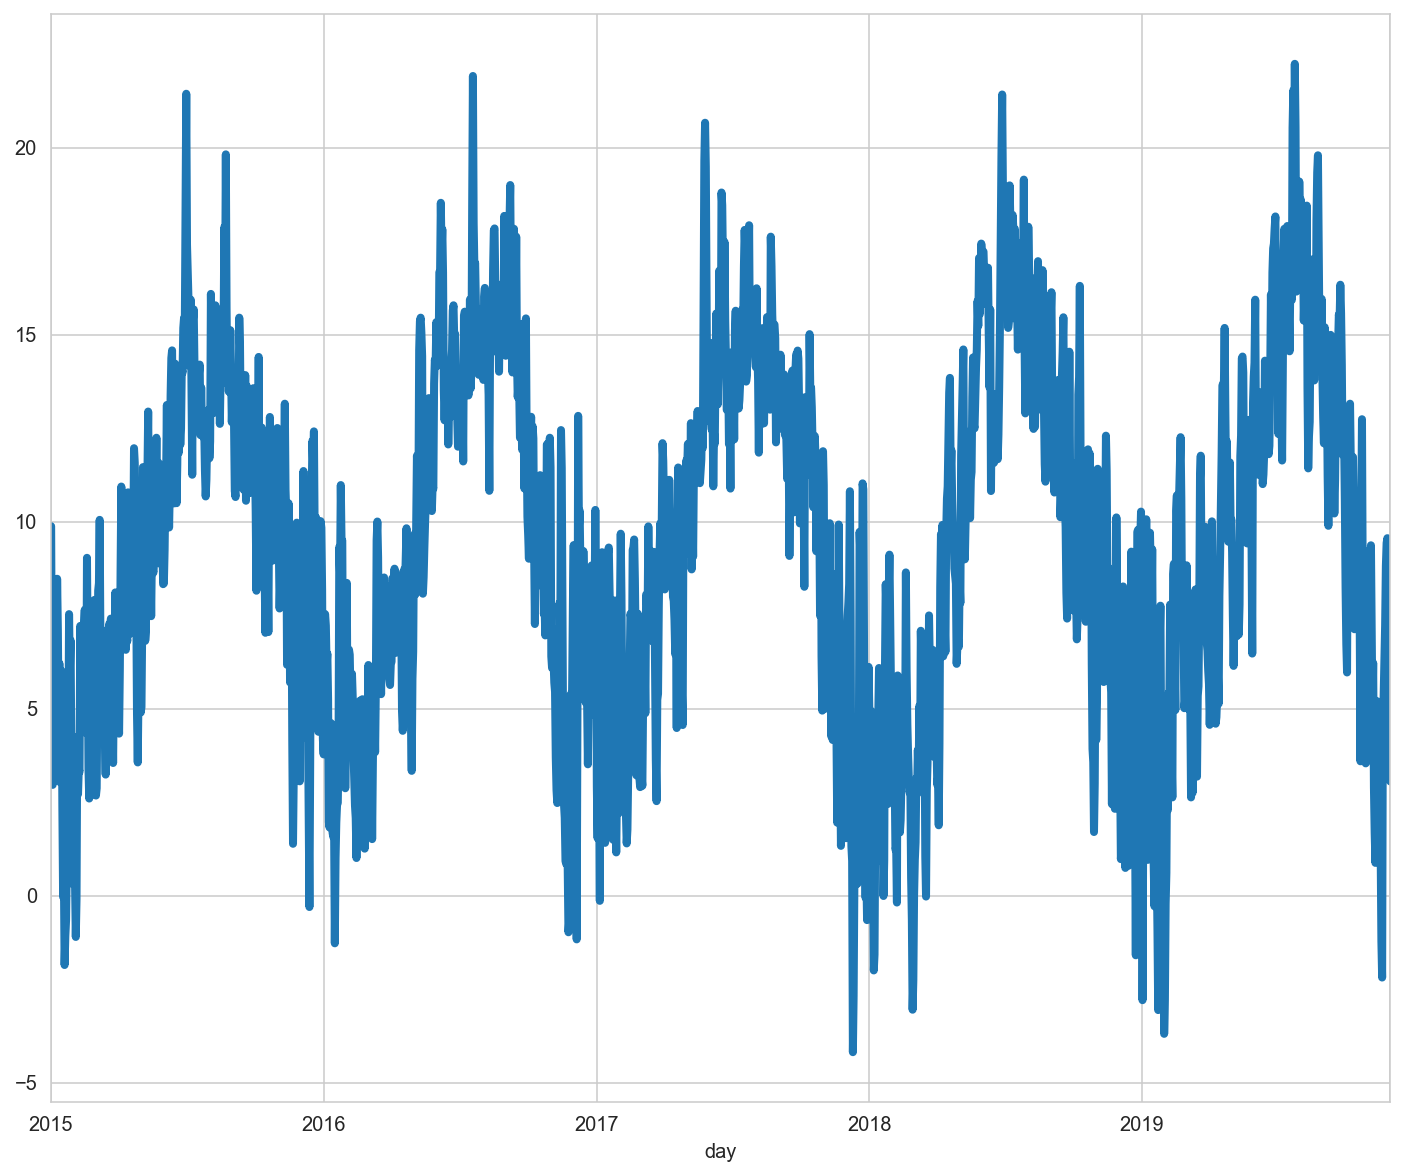

In [40]:
# check if there is any trends for avg daily using plot
df['avg'].plot(lw=4, figsize=(12, 10))
plt.show()

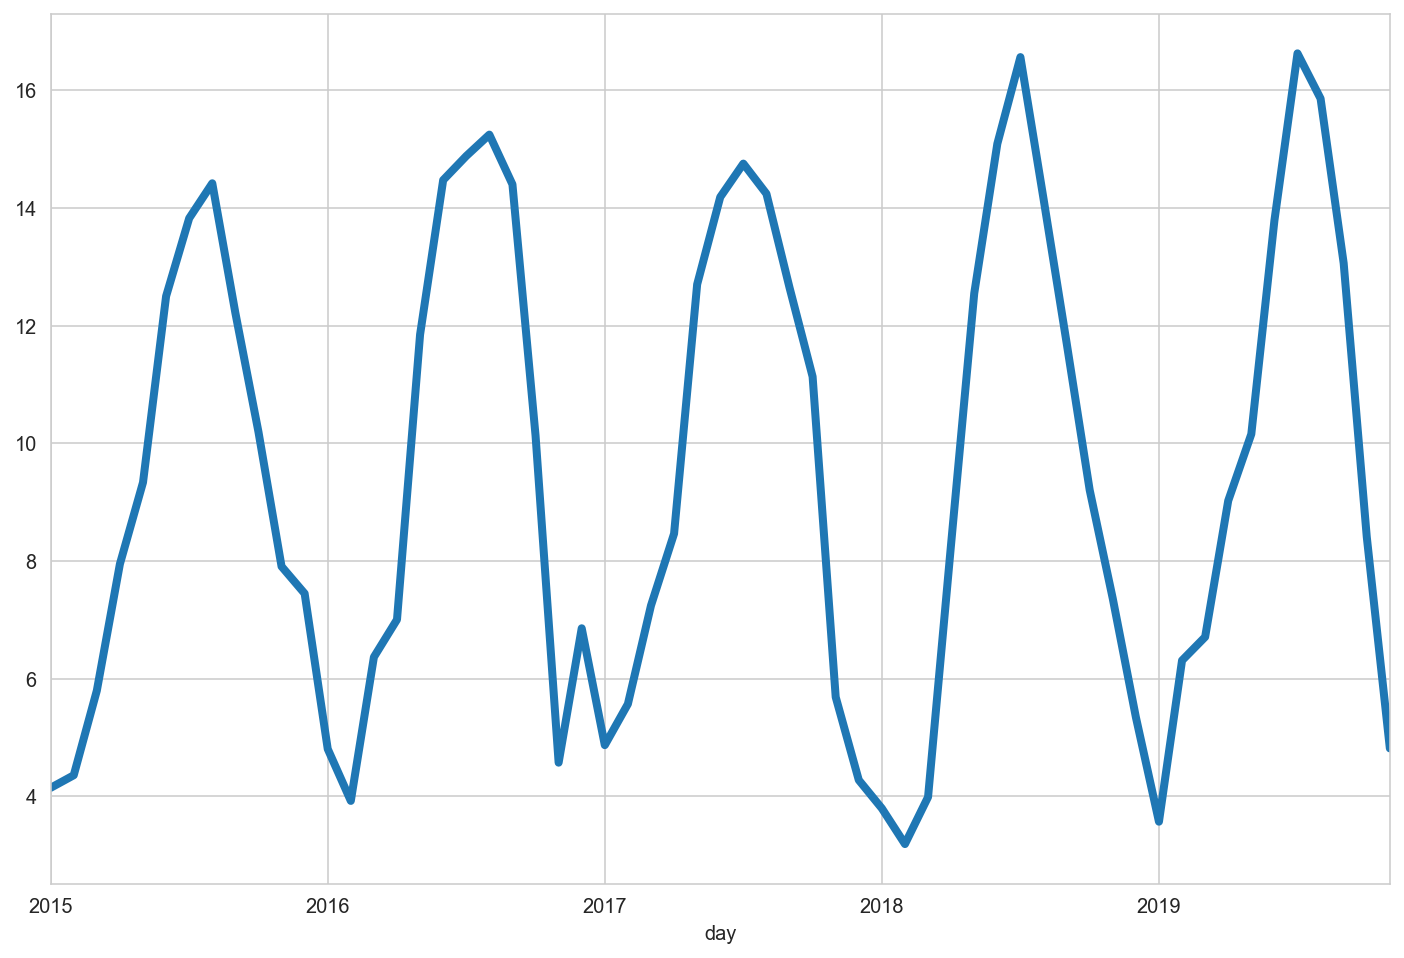

In [44]:
# check if there is any trends for avg monthly using plot
avg.plot(lw=4, figsize=(12, 8))
plt.show()

In [45]:
# use auto_arima to find the optimum order and seasona_order
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=134.731, BIC=137.898, Fit time=0.011 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=132.149, BIC=138.483, Fit time=0.251 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=132.705, BIC=137.456, Fit time=0.058 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=130.720, BIC=138.637, Fit time=0.578 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=134.503, BIC=140.837, Fit time=0.826 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=132.024, BIC=141.525, Fit time=0.884 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 0, 12); AIC=132.173, BIC=14

In [46]:
# creat SARIMAX model
model = SARIMAX(train, order=(1, 0, 0),
               seasonal_order=(2, 1, 0, 12), 
               enforce_stationarity=True,
               enforce_invertibility=True, freq='MS').fit()

In [47]:
# prediction
pred = model.predict(start = '2019', end = '2021')

C:\Users\Talal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


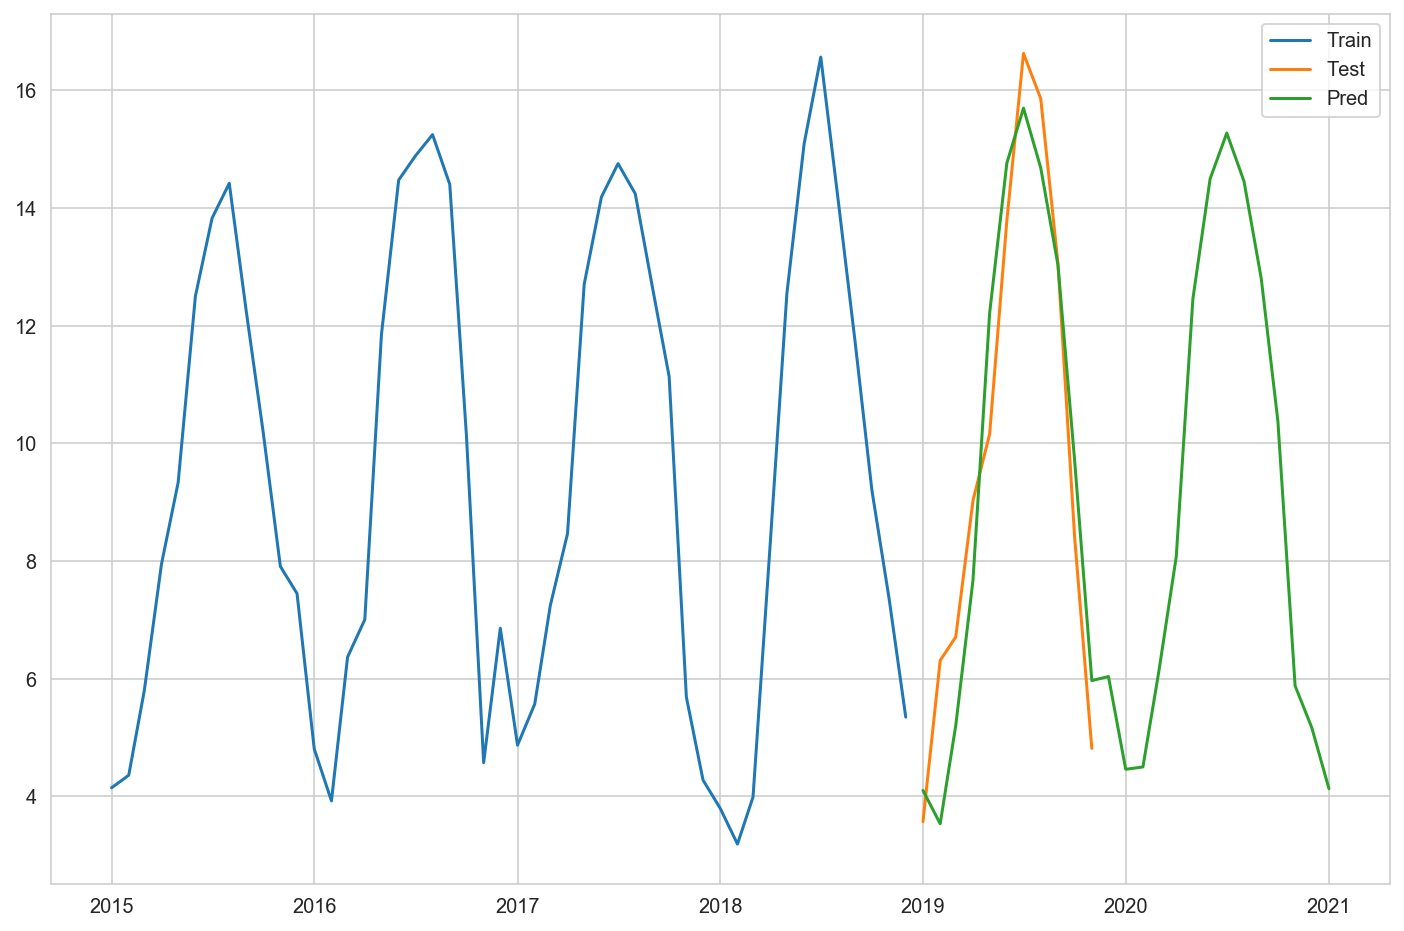

In [48]:
# plot the train, test and the prediction to see how accurate visually
plt.figure(figsize=(12,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.legend(loc='Best')
plt.show()

In [49]:
# calculate the RMSE error
rmse = sqrt(mean_squared_error(test, pred[:-14]))
rmse

1.431778479074089

# Conclusion

so at the end we can see how accurate the forecasts is from the RMSE.

the RMSE for the max temperature = 2.4 

the RMSE for the minimum temperature = 1.3

the RMSE for the average temperature = 1.4